# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [2]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data = data, index = labels)
print(df)

   age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2
d  NaN    dog      yes       3
e  5.0    dog       no       2
f  2.0    cat       no       3
g  4.5  snake       no       1
h  NaN    cat      yes       1
i  7.0    dog       no       2
j  3.0    dog       no       1


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [4]:
df.head(3)
df.iloc[[0, 1, 2]]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [5]:
df.iloc[:, [True, True, False, False]]

,age,animal
a,2.5,cat
b,3.0,cat
c,0.5,snake
d,NaN,dog
e,5.0,dog
f,2.0,cat
g,4.5,snake
h,NaN,cat
i,7.0,dog
j,3.0,dog


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [6]:
df.iloc[[3, 4, 8], [True, True, False, False]]

,age,animal
d,NaN,dog
e,5.0,dog
i,7.0,dog


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [7]:
df.loc[df['visits'] > 3]

,age,animal,priority,visits


```Select the rows where the age is missing, i.e. is `NaN`.```

In [8]:
df.loc[np.isnan(df['age'])]

,age,animal,priority,visits
d,NaN,dog,yes,3
h,NaN,cat,yes,1


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [9]:
df.loc[(df['age'] < 3) & (df['animal'] == "cat")]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


```Select the rows the age is between 2 and 4 (inclusive).```

In [10]:
df.loc[(df['age'] <= 4) & (df['age'] >= 2)]

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
f,2.0,cat,no,3
j,3.0,dog,no,1


```Change the age in row 'f' to 1.5.```

In [11]:
df.set_value('f', 'age', 1.5)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [12]:
df['visits'].sum()
np.sum(df.iloc[:, [3]])

visits    19
dtype: int64

```Calculate the mean age for each different animal in `df`.```

In [13]:
df.groupby(['animal']).mean()

,age,visits
animal,,
cat,2.333333,2.0
dog,5.000000,2.0
snake,2.500000,1.5


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [14]:
df.loc['k'] = [4, "lion", "no", 7]
df.drop('k', inplace = True)
df

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,1.5,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


```Count the number of each type of animal in `df`.```

In [15]:
df.groupby(['animal']).size()

animal
cat      4
dog      4
snake    2
dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [16]:
df.sort_values(by='age', ascending = False)
df.sort_values(by= 'visits', ascending = True)

,age,animal,priority,visits
a,2.5,cat,yes,1
g,4.5,snake,no,1
h,NaN,cat,yes,1
j,3.0,dog,no,1
c,0.5,snake,no,2
e,5.0,dog,no,2
i,7.0,dog,no,2
b,3.0,cat,yes,3
d,NaN,dog,yes,3
f,1.5,cat,no,3


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [17]:
df.priority.replace(('yes', 'no'), ('True', 'False'), inplace=True)
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,snake,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,snake,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [18]:
df.animal.replace(('snake'), ('python'), inplace=True)
df

,age,animal,priority,visits
a,2.5,cat,True,1
b,3.0,cat,True,3
c,0.5,python,False,2
d,NaN,dog,True,3
e,5.0,dog,False,2
f,1.5,cat,False,3
g,4.5,python,False,1
h,NaN,cat,True,1
i,7.0,dog,False,2
j,3.0,dog,False,1


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [19]:
pd.pivot_table(df,index=['animal'], columns = ['visits'], values=['age'], aggfunc = np.average)

age           
visits    1    2     3
animal                
cat     NaN  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN

```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
df2 = pd.DataFrame(data = {"age":np.random.randint(low = 20, high = 65, size = 1000),"skill":np.random.normal(loc = 0.5, scale = 0.3, size = 1000),"height":np.around(np.random.uniform(low = 1.5, high = 2.0, size = 1000), decimals = 2)})

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
df2["salary"] = 1000 * ((df2["age"]) ** 2) /1000 + 1.7 * df2["skill"] + 0.4 *np.exp(-(df2["height"]-1.7) ** 2)

```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [22]:
df2.groupby(df2['age'] % 10).count()
df2['salary'].groupby(df2['age'] % 10).mean()
df2['height'].groupby(df2['age'] % 10).max()

df2.groupby(df2['age']).count()
df2['salary'].groupby(df2['age']).mean()
df2['height'].groupby(df2['age']).max()

age
20    1.99
21    1.98
22    1.98
23    1.99
24    1.99
25    2.00
26    1.98
27    1.95
28    2.00
29    1.99
30    1.96
31    1.96
32    1.99
33    2.00
34    1.99
35    1.99
36    1.99
37    1.97
38    1.99
39    2.00
40    1.96
41    1.88
42    2.00
43    2.00
44    1.99
45    1.99
46    1.99
47    1.98
48    1.98
49    2.00
50    1.99
51    1.97
52    1.99
53    1.94
54    2.00
55    1.98
56    1.98
57    1.97
58    2.00
59    1.99
60    1.99
61    1.99
62    1.99
63    1.99
64    1.94
Name: height, dtype: float64

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [23]:
df2['salary'].groupby(df2['age']).mean() / df2['height'].groupby(df2['age']).sum()

age
20      8.263594
21     12.862068
22      9.600514
23     14.002505
24     20.984107
25     18.729972
26     29.181442
27     23.854832
28     18.083014
29     15.417115
30     21.332552
31     24.435963
32     29.385686
33     22.651348
34     19.877197
35     30.333588
36     27.935116
37     34.444222
38     46.544592
39     43.747118
40     34.609764
41     52.258319
42     55.299212
43     56.290250
44     68.196743
45     42.631368
46     53.248728
47     73.603391
48     77.741551
49     52.612458
50     69.440185
51     73.557160
52     54.970309
53     69.850639
54     58.687298
55     90.990044
56     62.312191
57     84.158561
58    147.015172
59    101.731920
60    101.580426
61     78.924050
62     88.133802
63     89.543086
64    149.101070
dtype: float64

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

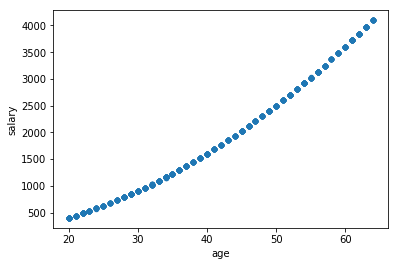

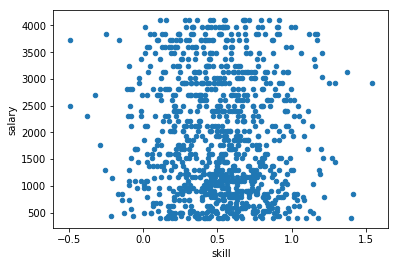

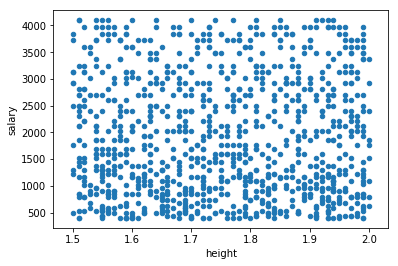

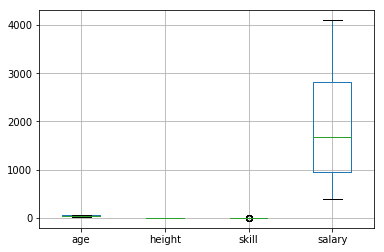

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

df2.plot(x="age", y="salary", kind="scatter")
plt.show()

df2.plot(x="skill", y="salary", kind="scatter")
plt.show()

df2.plot(x="height", y="salary", kind="scatter")
plt.show()

df2.boxplot()
plt.show()

```Save the result as a csv```

In [0]:
df2.to_csv("save.csv")

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

('Oldest House:',         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1349  1350          70         50.0     5250            8            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
1349       1872          1987         0.0         259  ...           0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1349           54             20          0            0         0        0   

      MoSold  YrSold  SalePrice  
1349      12    2008     122000  

[1 rows x 38 columns])
('Highest Price:', 755000)
('Mean Area:', 10516.828082191782)
('Area 50-percentile:', 9478.5)
('Are Fireplaces more common:', True)
('Mean price for houses with swimming pools:', 288138.5714285714)


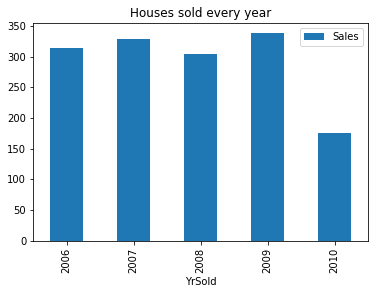

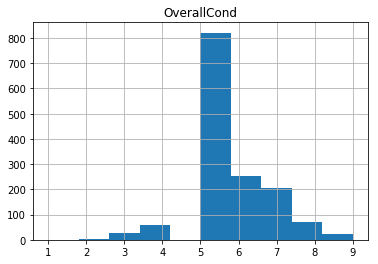

Fireplace Statistics: 
            FullBath  YearBuilt      SalePrice
Fireplaces                                    
0                  4  54.781159  141331.482609
1                  4  39.150769  211843.909231
2                  4  54.347826  240588.539130
3                  2  38.400000  252000.000000
      OverallCond                   Is a multiple of 20
             mean max min       std                    
False    5.923077   9   1  1.442613               False
True     5.442763   9   2  0.924615                True


In [28]:
print("Oldest House:" ,df[df["YearBuilt"] == df["YearBuilt"].min()])

print("Highest Price:", df["SalePrice"].max())

print("Mean Area:", df["LotArea"].mean())

print("Area 50-percentile:", np.percentile(df["LotArea"], 50))

ownerships = (df["Fireplaces"] > 0).reset_index(name='HasFirePlace').groupby("HasFirePlace").size()
print("Are Fireplaces more common:", ownerships[True] >= ownerships[False])

print("Mean price for houses with swimming pools:", df[df["PoolArea"] > 0]["SalePrice"].mean())

sold_years = df.groupby("YrSold").size().reset_index(name="Sales")
sold_years.plot(x="YrSold", y="Sales", kind="bar")
plt.title("Houses sold every year")
plt.show()

df.hist(column="OverallCond")
plt.show()

print("Fireplace Statistics: ")
fireplaces = df.groupby("Fireplaces")
print(fireplaces.agg({'SalePrice': 'mean', 'YearBuilt': lambda x: np.mean(2019 - x), 'FullBath': lambda x: len(np.unique(x))}))

filtered_over_60 = df[df['MSSubClass'] > 60]
filter_func = (lambda df, x: df['MSSubClass'].loc[x] % 20 == 0)
MSSubClass = df.groupby(lambda x: filter_func(df, x))
res = MSSubClass.agg({'OverallCond': ['mean', 'max', 'min', 'std']})
res["Is a multiple of 20"] = res.index
print(res)

## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [30]:
SQ_FEET_TO_SQ_METER_FACTOR = 0.09290304
FEATURES_COUNT = 11

def get_df_with_features(df, lot=True):
    df['LotArea[meters]'] = df['LotArea'] / SQ_FEET_TO_SQ_METER_FACTOR
    df['FloorSFSum'] = df['1stFlrSF'] + df['2ndFlrSF']
    df['GarageAreaSqrt'] = df['GarageArea'] ** 0.5
    df['LotArea_for_BedroomAbvGr+1'] = df['LotArea'] / (df["BedroomAbvGr"] + 1) 

    year = df.groupby('YearBuilt')
    means = year.agg({'LotArea': lambda x: np.mean(x) + 1e-5})

    def update_row(row):
        row['LotArea'] = (float(row['LotArea']) / means.loc[row['YearBuilt']]['LotArea'])
        return row

    df['LotArea over mean LotArea same year'] = df.apply(update_row, axis=1)['LotArea']

    df = df.sort_values(by="LotArea", ascending=False)
    df['LotArea Ranking'] = df.reset_index().index + 1

    if lot:
        indicators_df = pd.get_dummies(df['LotConfig'])
        df = df.join(indicators_df).sort_values(by="SalePrice", ascending=True)
    
    return df, indicators_df
    
final_df, dummies = get_df_with_features(df)
# print(final_df)
# print(feat)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscVal,MoSold,YrSold,SalePrice,LotConfig,LotArea[meters],FloorSFSum,GarageAreaSqrt,LotArea_for_BedroomAbvGr+1,LotArea over mean LotArea same year
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,2,2008,208500,Inside,90955.043021,1710,23.409400,2112.500000,0.874874
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,5,2007,181500,FR2,103333.540000,1262,21.447611,2400.000000,1.043942
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,9,2008,223500,Inside,121093.992188,1786,24.657656,2812.500000,1.080951
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,2,2006,140000,Corner,102795.344480,1717,25.337719,2387.500000,1.045441
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,12,2008,250000,FR2,153493.362542,2198,28.913665,2852.000000,1.739272
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,700,10,2009,143000,Inside,151932.595532,1362,21.908902,7057.500000,1.451537
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,8,2007,307000,Inside,108543.272642,1694,25.219040,2521.000000,1.182699
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,350,11,2009,200000,Corner,111750.917946,2090,22.000000,2595.500000,1.732013
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,4,2008,129900,Inside,65875.131750,1774,21.633308,2040.000000,0.973799
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,1,2008,118000,Corner,79868.215292,1077,14.317821,2473.333333,0.888157


## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


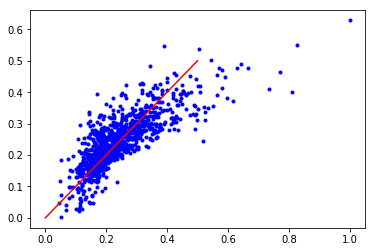

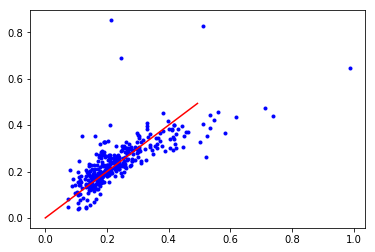

In [32]:
x = final_df[final_df.columns[-FEATURES_COUNT:]].copy()
y = final_df['SalePrice']

y = y / max(y)
scaler = StandardScaler()
x = scaler.fit_transform(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y)

regressor = LinearRegression(normalize = False)
regressor.fit(x_train, y_train)

y_train_predict = regressor.predict(x_train)
y_test_predict = regressor.predict(x_test)

plt.plot(y_train, y_train_predict, "b.")
plt.plot([0, max(y_train)/2], [0, max(y_train)/2], "r")
plt.show()

plt.plot(y_test, y_test_predict, "b.")
plt.plot([0, max(y_test)/2], [0, max(y_test)/2], "r")
plt.show()

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [33]:
from sklearn.linear_model import Ridge
# df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscVal,MoSold,YrSold,SalePrice,LotConfig,LotArea[meters],FloorSFSum,GarageAreaSqrt,LotArea_for_BedroomAbvGr+1,LotArea over mean LotArea same year
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,2,2008,208500,Inside,90955.043021,1710,23.409400,2112.500000,0.874874
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,5,2007,181500,FR2,103333.540000,1262,21.447611,2400.000000,1.043942
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,9,2008,223500,Inside,121093.992188,1786,24.657656,2812.500000,1.080951
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,2,2006,140000,Corner,102795.344480,1717,25.337719,2387.500000,1.045441
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,12,2008,250000,FR2,153493.362542,2198,28.913665,2852.000000,1.739272
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,700,10,2009,143000,Inside,151932.595532,1362,21.908902,7057.500000,1.451537
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,8,2007,307000,Inside,108543.272642,1694,25.219040,2521.000000,1.182699
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,350,11,2009,200000,Corner,111750.917946,2090,22.000000,2595.500000,1.732013
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,4,2008,129900,Inside,65875.131750,1774,21.633308,2040.000000,0.973799
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,1,2008,118000,Corner,79868.215292,1077,14.317821,2473.333333,0.888157


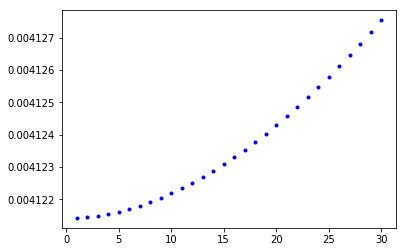

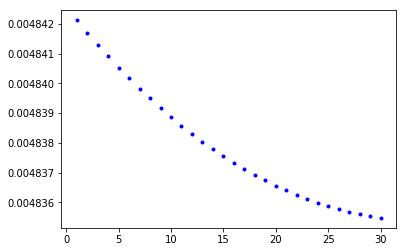

In [34]:
feat = ['LotArea[meters]', 'FloorSFSum', 'GarageAreaSqrt', 'LotArea_for_BedroomAbvGr+1', 'LotArea over mean LotArea same year']
ndexes = [i for i in range(len(df))]
lotAreaMeters = df['LotArea'] * 0.09290304
lotAreaMeters2 = lotAreaMeters**2
lotAreaMeters3 = lotAreaMeters**3
twoFloors = df['1stFlrSF'] + df['2ndFlrSF']
twoFloors2 = twoFloors**2
twoFloors3 = twoFloors**3
garageSquare = df['GarageArea'] ** 0.5
garageSquare2 = garageSquare**2
garageSquare3 = garageSquare**3
areaForBed = lotAreaMeters / (df['BedroomAbvGr'] + 1)
areaForBed2 = areaForBed**2
areaForBed3 = areaForBed**3
lotForYear = [0 for i in range(len(df))]
byYears = df.groupby('YearBuilt').agg({'LotArea' : 'mean'})
houseRanking = df.sort_values(by = ['LotArea'], ascending = [False])
rank = [0 for i in range(len(df))]
rank2 = [0 for i in range(len(df))]
rank3 = [0 for i in range(len(df))]
lotForYear2 = [0 for i in range(len(df))]
lotForYear3 = [0 for i in range(len(df))]
for i in range(len(df) - 1):
    rank[houseRanking.loc[i]['Id']] = i
    year = df.iloc[i]['YearBuilt']
    lotForYear[i] = lotAreaMeters.iloc[i]/(1e-5 + byYears.loc[year]['LotArea'])
    lotForYear2[i] = lotForYear[i]**2
    lotForYear3[i] = lotForYear[i]**3
    rank2[i] = rank[i]**2
    rank3[i] = rank[i]**3
hotEncoding=pd.get_dummies(df['LotConfig']) #no need to addd dummies^2 and ^3 as 1^3 = 1, 0^3 = 0 and it wont give extra info
Data = {'LotArea' : lotAreaMeters, 'FlrSF' : twoFloors, 'Garage' : garageSquare, 'AreaForBed' : areaForBed, 'LotValueForYear' : 
       lotForYear, 'LotAreaRank' : rank, 'LotArea2' : lotAreaMeters2, 'FlrSF2' : twoFloors2, 'Garage2' : garageSquare2, 'AreaForBed2' : areaForBed2, 'LotValueForYear2' : 
       lotForYear2, 'LotAreaRank2' : rank2, 'LotArea3' : lotAreaMeters3, 'FlrSF3' : twoFloors3, 'Garage3' : garageSquare3, 'AreaForBed3' : areaForBed3, 'LotValueForYear3' : 
       lotForYear3, 'LotAreaRank3' : rank3}
myDf = pd.DataFrame(Data)
myDf = myDf.join(hotEncoding)
names = ['LotArea', 'FlrSF', 'Garage', 'AreaForBed', 'LotValueForYear', 'LotAreaRank','Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'] #didnt feel the need to add the other powers
#didnt use that list anyway so it felt useless


x = final_df[final_df.columns[-FEATURES_COUNT:]].copy()
y = final_df['SalePrice']

y = y / max(y)
scaler = StandardScaler()
x = scaler.fit_transform(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y)

y_train_predict_arr = []
y_test_predict_arr = []
mse_train = []
mse_test = []

for a in range(30): 
  regressor = Ridge(a+1)
  regressor.fit(x_train, y_train)

  y_train_predict_arr.append(regressor.predict(x_train))
  y_test_predict_arr.append(regressor.predict(x_test)) 
  
  mse_train.append(mean_squared_error(y_train, y_train_predict_arr[a]))
  mse_test.append(mean_squared_error(y_test, y_test_predict_arr[a]))

plt.plot(range(1,31), mse_train, "b.")
plt.show()

plt.plot(range(1,31), mse_test, "b.")
plt.show()